## Notebook documentation / section guide

This cell documents each section (cell group) in the notebook, what it does, inputs/outputs, and notes for reproducibility.

1) Imports and settings
- Purpose: import required Python libraries and configure plotting defaults.
- Key code: `import pandas as pd`, `import numpy as np`, `matplotlib`, `seaborn`, and `%matplotlib inline`.
- Inputs: none.
- Outputs: plotting style and variables available to later cells.
- Notes: install packages in `.venv` (see next steps). If running in a fresh environment, install packages from `requirements.txt` or run `pip install pandas numpy matplotlib seaborn`.

2) Load the dataset
- Purpose: read `healthexp.csv` into a pandas DataFrame called `df` and show basic diagnostics.
- Key code: `df = pd.read_csv('healthexp.csv')`, `df.head()`, `df.dtypes`, `df.describe()`.
- Inputs: `healthexp.csv` in the project root.
- Outputs: `df` DataFrame used by all downstream cells.
- Notes: check the working directory if `pd.read_csv` fails; use an absolute path if needed.

3) Quick checks
- Purpose: verify missing values, number of countries, year range, and calculate a sample pivot (mean spending by country).
- Key code: `df.isna().sum()`, `df['Country'].nunique()`, `df.groupby('Country')['Spending_USD'].mean()`.
- Inputs: `df` DataFrame.
- Outputs: printed diagnostics and `spend_by_country` Series.
- Notes: Use this to decide if any cleaning or filtering is required before analysis.

4) Static visualizations (Matplotlib / Seaborn)
- Purpose: exploratory plots to visualize spending over time for selected countries, scatter of spending vs life expectancy, and a correlation heatmap.
- Key code: `plt.plot(...)`, `sns.scatterplot(...)`, `sns.heatmap(...)`.
- Inputs: `df` DataFrame.
- Outputs: static PNG plots rendered inline.
- Notes: Good for quick, publication-ready static images.

5) Interactive visualizations (Plotly)
- Purpose: interactive time series and scatterplots allowing hover, zoom, and legend toggling.
- Key code: `plotly.express` line and scatter plots.
- Inputs: `df` DataFrame.
- Outputs: interactive HTML widgets embedded in notebook.
- Notes: Requires `plotly` installed. Use `pip install plotly` in your environment. For larger datasets, consider downsampling before interactive plotting.

6) Regression analysis (statsmodels)
- Purpose: fit an OLS model predicting `Life_Expectancy` from `Spending_USD` and show diagnostics.
- Key code: `smf.ols('Life_Expectancy ~ Spending_USD', data=df).fit()`, `model.summary()`, residual diagnostics (residuals vs fitted, QQ plot).
- Inputs: `df` DataFrame.
- Outputs: regression summary printed to the notebook and diagnostic plots.
- Notes: This is a pooled OLS model across countries and years. It does not account for country fixed effects or temporal correlation. Consider panel/FE models or clustered standard errors for robust inference.


# Health Expenditure EDA

This notebook explores `healthexp.csv` — health spending (USD) and life expectancy across countries and years.

**Notebook contents**
- Data loading
- Initial overview and cleaning checks
- Time series and scatter plots
- Correlation heatmap

*Generated by assistant to scaffold the EDA.*

In [7]:
# Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotting defaults
%matplotlib inline
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [8]:
# Load the dataset
df = pd.read_csv('healthexp.csv')

display(df.shape)
display(df.head())
display(df.dtypes)
display(df.describe(include='all'))

(274, 4)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object

,Year,Country,Spending_USD,Life_Expectancy
count,274.000000,274,274.000000,274.000000
unique,NaN,6,NaN,NaN
top,NaN,USA,NaN,NaN
freq,NaN,51,NaN,NaN
mean,1996.992701,NaN,2789.338905,77.909489
std,14.180933,NaN,2194.939785,3.276263
min,1970.000000,NaN,123.993000,70.600000
25%,1985.250000,NaN,1038.357000,75.525000
50%,1998.000000,NaN,2295.578000,78.100000
75%,2009.000000,NaN,4055.610000,80.575000


In [9]:
# Quick checks
print('Missing values:\n', df.isna().sum())
print('\nUnique countries:', df['Country'].nunique())
print('\nYear range:', df['Year'].min(), '-', df['Year'].max())

# sample pivot: mean spending per country
spend_by_country = df.groupby('Country')['Spending_USD'].mean().sort_values(ascending=False)
spend_by_country.head(10)

Missing values:
 Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

Unique countries: 6

Year range: 1970 - 2020


Country
USA              4388.570529
France           3045.145057
Canada           2685.778341
Germany          2667.280200
Great Britain    2034.192465
Japan            1860.257902
Name: Spending_USD, dtype: float64

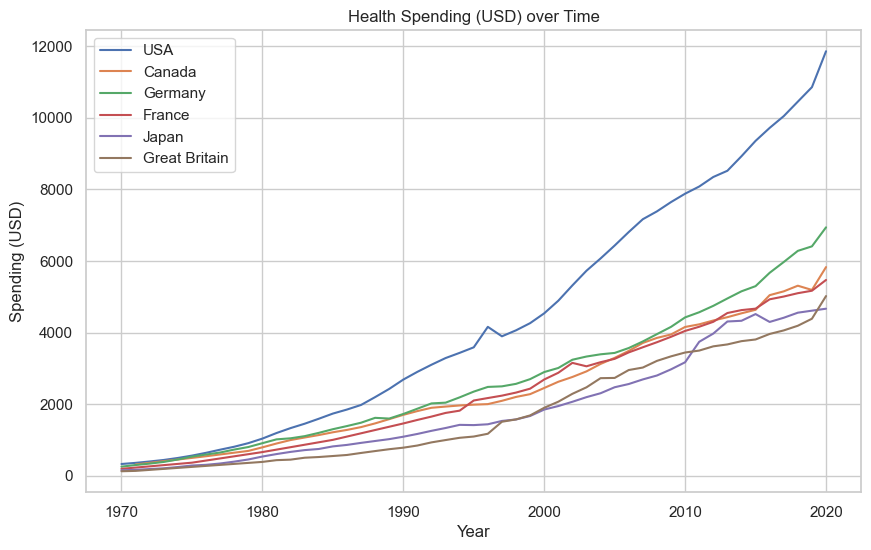

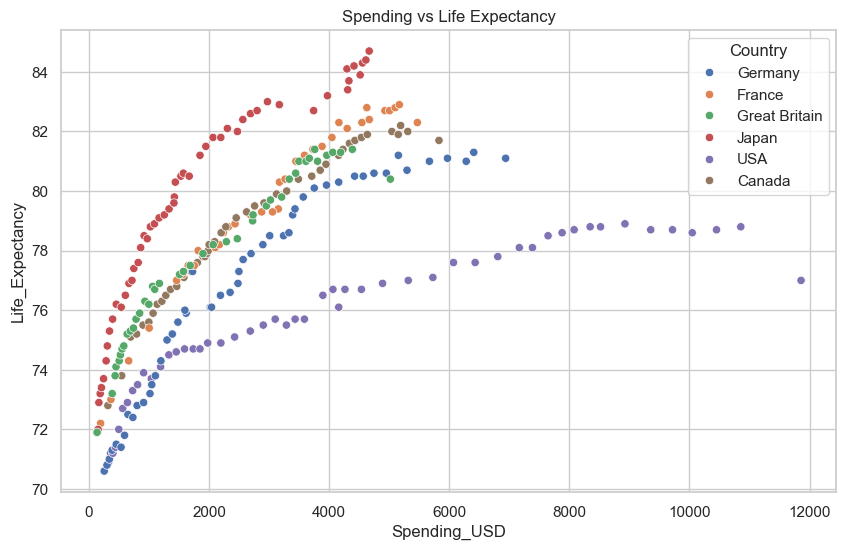

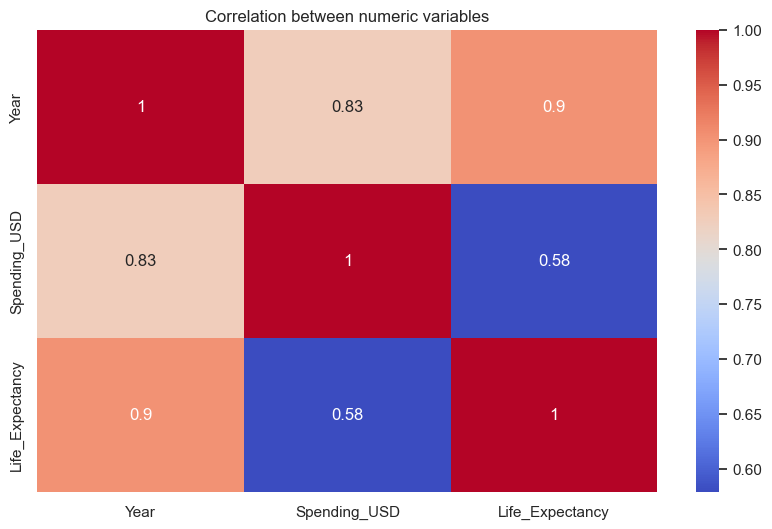

In [10]:
# Time series: spending over time for selected countries
cols = ['USA','Canada','Germany','France','Japan','Great Britain']
plt.figure()
for c in cols:
    sub = df[df['Country']==c]
    plt.plot(sub['Year'], sub['Spending_USD'], label=c)
plt.title('Health Spending (USD) over Time')
plt.xlabel('Year')
plt.ylabel('Spending (USD)')
plt.legend()
plt.show()

# Scatter: spending vs life expectancy (colored by country)
plt.figure()
sns.scatterplot(data=df, x='Spending_USD', y='Life_Expectancy', hue='Country')
plt.title('Spending vs Life Expectancy')
plt.show()

# Correlation heatmap
plt.figure()
num = df.select_dtypes(include=[np.number])
sns.heatmap(num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numeric variables')
plt.show()

In [11]:
# Interactive plots with Plotly
import plotly.express as px
import plotly.graph_objects as go

# interactive time series for a selected country (dropdown)
fig = px.line(df[df['Country'].isin(['USA','Canada','Germany','France','Japan','Great Britain'])],
              x='Year', y='Spending_USD', color='Country', title='Interactive Health Spending over Time')
fig.update_layout(hovermode='x unified')
fig.show()

# interactive scatter with tooltips
fig2 = px.scatter(df, x='Spending_USD', y='Life_Expectancy', color='Country', hover_data=['Year'])
fig2.update_traces(marker=dict(size=8, opacity=0.8))
fig2.update_layout(title='Interactive: Spending vs Life Expectancy')
fig2.show()

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     137.5
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           5.70e-26
Time:                        21:04:16   Log-Likelihood:                -657.40
No. Observations:                 274   AIC:                             1319.
Df Residuals:                     272   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       75.4970      0.262    288.562   

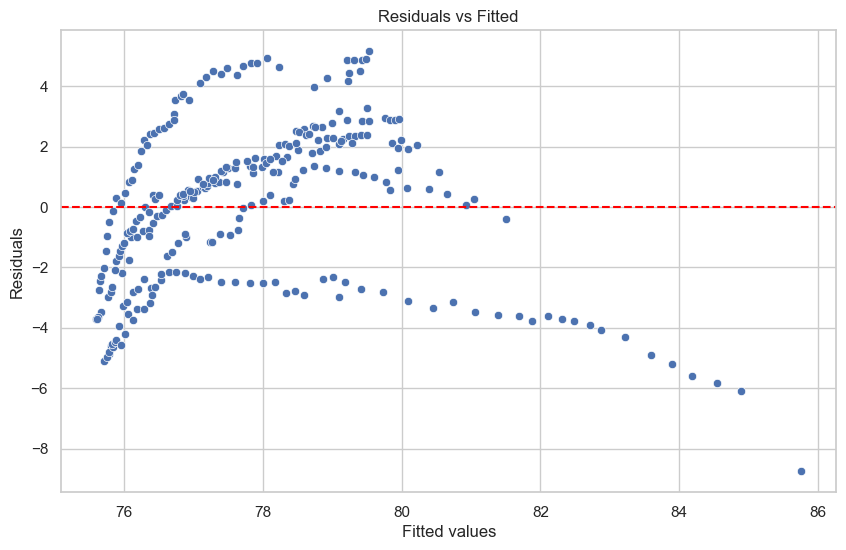

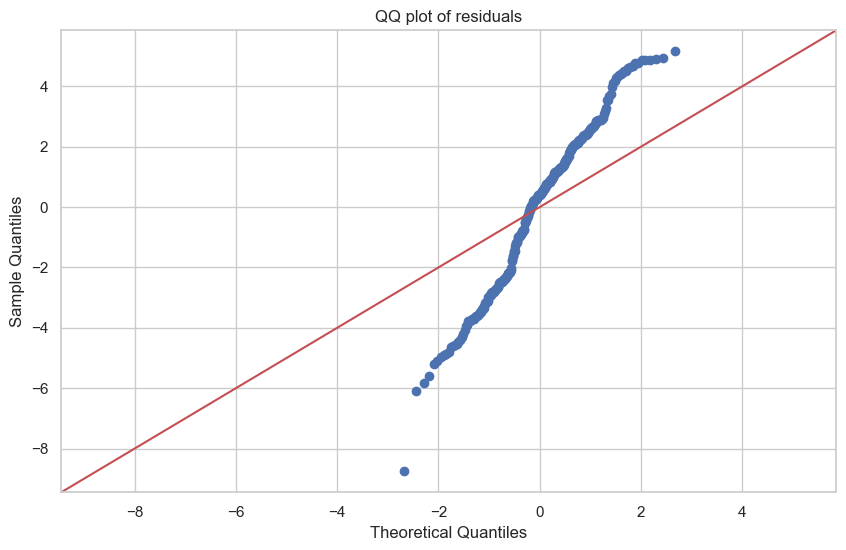

In [12]:
# Regression: Life Expectancy ~ Spending_USD
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit OLS model
model = smf.ols('Life_Expectancy ~ Spending_USD', data=df).fit()
print(model.summary())

# Coefficient and simple interpretation
coef = model.params['Spending_USD']
print(f"Coefficient (Spending_USD): {coef:.6f} (years per USD)")
print(f"R-squared: {model.rsquared:.4f}")

# Diagnostic plots: residuals vs fitted and QQ plot
fitted = model.fittedvalues
resid = model.resid

plt.figure()
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

sm.qqplot(resid, line='45')
plt.title('QQ plot of residuals')
plt.show()